# Практика №2. Алгоритмы сортировки

## Необходимые импорты

In [2]:
import math
import timeit
import pandas as pd
from random import randint
from matplotlib import pyplot as plt

## Функции сортировки

### Пузырьковая сортировка

In [3]:
def bubble_sort(list_nums):
    swap_bool = True
    while swap_bool:
        swap_bool = False
        for i in range(len(list_nums) - 1):
            if list_nums[i] > list_nums[i + 1]:
                list_nums[i], list_nums[i + 1] = list_nums[i + 1], list_nums[i]
                swap_bool = True
    return list_nums

### Шейкерная сортировка

In [4]:
def shaker_sort(list_nums):
    left = 0
    right = len(list_nums) - 1
    while left <= right:
        for i in range(left, right, +1):
            if list_nums[i] > list_nums[i + 1]:
                list_nums[i], list_nums[i + 1] = list_nums[i + 1], list_nums[i]
        right -= 1
        for i in range(right, left, -1):
            if list_nums[i - 1] > list_nums[i]:
                list_nums[i], list_nums[i - 1] = list_nums[i - 1], list_nums[i]
        left += 1
    return list_nums

### Сортировка вставками

In [5]:
def insertion_sort(list_nums):
    for i in range(len(list_nums)):
        cursor = list_nums[i]
        pos = i
        while pos > 0 and list_nums[pos - 1] > cursor:
            list_nums[pos] = list_nums[pos - 1]
            pos = pos - 1
        list_nums[pos] = cursor
    return list_nums

### Гномья сортировка

In [6]:
def gnome_sort(list_nums):
    i, size = 1, len(list_nums)
    while i < size:
        if list_nums[i - 1] <= list_nums[i]:
            i += 1
        else:
            list_nums[i - 1], list_nums[i] = list_nums[i], list_nums[i - 1]
            if i > 1:
                i -= 1
    return list_nums

### Гномья сортировка (оптимизированная)

In [7]:
def gnome_opt_sort(list_nums):
    i, j, size = 1, 2, len(list_nums)
    while i < size:
        if list_nums[i - 1] <= list_nums[i]:
            i, j = j, j + 1
        else:
            list_nums[i - 1], list_nums[i] = list_nums[i], list_nums[i - 1]
            i -= 1
            if i == 0:
                i, j = j, j + 1
    return list_nums

### Сортировка слиянием

In [8]:
def merge_sort(list_nums):
    if len(list_nums) < 2:
        return list_nums
    mid = len(list_nums) // 2
    left, right = merge_sort(list_nums[:mid]), merge_sort(list_nums[mid:])

    return merge(left, right, list_nums.copy())


def merge(left, right, result_list):
    left_cursor, right_cursor = 0, 0
    while left_cursor < len(left) and right_cursor < len(right):
        if left[left_cursor] <= right[right_cursor]:
            result_list[left_cursor + right_cursor] = left[left_cursor]
            left_cursor += 1
        else:
            result_list[left_cursor + right_cursor] = right[right_cursor]
            right_cursor += 1

    for left_cursor in range(left_cursor, len(left)):
        result_list[left_cursor + right_cursor] = left[left_cursor]

    for right_cursor in range(right_cursor, len(right)):
        result_list[left_cursor + right_cursor] = right[right_cursor]

    return result_list

### Сортировка с помощью двоичного дерева

In [9]:
class Node:
    def __init__(self, val):
        self.val = val
        self.left = None
        self.right = None

    def insert(self, val):
        if self.val:
            if val < self.val:
                if self.left is None:
                    self.left = Node(val)
                else:
                    self.left.insert(val)
            elif val > self.val:
                if self.right is None:
                    self.right = Node(val)
                else:
                    self.right.insert(val)
        else:
            self.val = val


def inorder(root, res):
    if root:
        inorder(root.left, res)
        res.append(root.val)
        inorder(root.right, res)


def tree_sort(list_nums):
    if len(list_nums) == 0:
        return list_nums
    root = Node(list_nums[0])
    for i in range(1, len(list_nums)):
        root.insert(list_nums[i])
    res = []
    inorder(root, res)
    return res

### Timsort

In [10]:
minimum = 32


def find_minrun(n):
    r = 0
    while n >= minimum:
        r |= n & 1
        n >>= 1
    return n + r


def insertion_sort_tim(array, left, right):
    for i in range(left + 1, right + 1):
        element = array[i]
        j = i - 1
        while element < array[j] and j >= left:
            array[j + 1] = array[j]
            j -= 1
        array[j + 1] = element
    return array


def merge_tim(array, p, m, r):
    array_length1 = m - p + 1
    array_length2 = r - m
    left = []
    right = []
    for i in range(0, array_length1):
        left.append(array[p + i])
    for i in range(0, array_length2):
        right.append(array[m + 1 + i])
    i = 0
    j = 0
    k = p
    while j < array_length2 and i < array_length1:
        if left[i] <= right[j]:
            array[k] = left[i]
            i += 1
        else:
            array[k] = right[j]
            j += 1
        k += 1
    while i < array_length1:
        array[k] = left[i]
        k += 1
        i += 1
    while j < array_length2:
        array[k] = right[j]
        k += 1
        j += 1


def tim_sort(array):
    n = len(array)
    minrun = find_minrun(n)
    for start in range(0, n, minrun):
        end = min(start + minrun - 1, n - 1)
        insertion_sort_tim(array, start, end)
    size = minrun
    while size < n:
        for left in range(0, n, 2 * size):
            mid = min(n - 1, left + size - 1)
            right = min((left + 2 * size - 1), (n - 1))
            merge_tim(array, left, mid, right)
        size = 2 * size

### Сортировка выбором

In [11]:
def selection_sort(list_nums):
    for i, e in enumerate(list_nums):
        mn = min(range(i, len(list_nums)), key=list_nums.__getitem__)
        list_nums[i], list_nums[mn] = list_nums[mn], e
    return list_nums

### Сортировка расчёской

In [12]:
def comb_sort(list_nums):
    gap = len(list_nums)
    swaps = True
    while gap > 1 or swaps:
        gap = max(1, int(gap / 1.25))  # minimum gap is 1
        swaps = False
        for i in range(len(list_nums) - gap):
            j = i + gap
            if list_nums[i] > list_nums[j]:
                list_nums[i], list_nums[j] = list_nums[j], list_nums[i]
                swaps = True
    return list_nums

### Сортировка Шелла

In [13]:
def shell_sort(list_nums):
    inc = len(list_nums) // 2
    while inc:
        for i, el in enumerate(list_nums):
            while i >= inc and list_nums[i - inc] > el:
                list_nums[i] = list_nums[i - inc]
                i -= inc
            list_nums[i] = el
        inc = 1 if inc == 2 else int(inc * 5.0 / 11)
    return list_nums

### Пирамидальная сортировка

In [14]:
def heapify(arr, n, i):
    largest = i
    l = 2 * i + 1
    r = 2 * i + 2
    if l < n and arr[largest] < arr[l]:
        largest = l
    if r < n and arr[largest] < arr[r]:
        largest = r
    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        heapify(arr, n, largest)


def heap_sort(arr):
    n = len(arr)
    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i)
    for i in range(n - 1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
        heapify(arr, i, 0)

### Плавная сортировка

In [15]:
def smooth_sort(lst):
    leo_nums = leonardo_numbers(len(lst))
    heap = []
    for i in range(len(lst)):
        if len(heap) >= 2 and heap[-2] == heap[-1] + 1:
            heap.pop()
            heap[-1] += 1
        else:
            if len(heap) >= 1 and heap[-1] == 1:
                heap.append(0)
            else:
                heap.append(1)
        restore_heap(lst, i, heap, leo_nums)
    for i in reversed(range(len(lst))):
        if heap[-1] < 2:
            heap.pop()
        else:
            k = heap.pop()
            t_r, k_r, t_l, k_l = get_child_trees(i, k, leo_nums)
            heap.append(k_l)
            restore_heap(lst, t_l, heap, leo_nums)
            heap.append(k_r)
            restore_heap(lst, t_r, heap, leo_nums)


def leonardo_numbers(hi):
    a, b = 1, 1
    numbers = []
    while a <= hi:
        numbers.append(a)
        a, b = b, a + b + 1
    return numbers


def restore_heap(lst, i, heap, leo_nums):
    current = len(heap) - 1
    k = heap[current]
    while current > 0:
        j = i - leo_nums[k]
        if (lst[j] > lst[i] and
                (k < 2 or lst[j] > lst[i - 1] and lst[j] > lst[i - 2])):
            lst[i], lst[j] = lst[j], lst[i]
            i = j
            current -= 1
            k = heap[current]
        else:
            break
    while k >= 2:
        t_r, k_r, t_l, k_l = get_child_trees(i, k, leo_nums)
        if lst[i] < lst[t_r] or lst[i] < lst[t_l]:
            if lst[t_r] > lst[t_l]:
                lst[i], lst[t_r] = lst[t_r], lst[i]
                i, k = t_r, k_r
            else:
                lst[i], lst[t_l] = lst[t_l], lst[i]
                i, k = t_l, k_l
        else:
            break


def get_child_trees(i, k, leo_nums):
    t_r, k_r = i - 1, k - 2
    t_l, k_l = t_r - leo_nums[k_r], k - 1
    return t_r, k_r, t_l, k_l

### Быстрая сортировка

In [16]:
def quick_sort(list_nums):
    less = []
    pivot_list = []
    more = []
    if len(list_nums) <= 1:
        return list_nums
    else:
        pivot = list_nums[0]
        for i in list_nums:
            if i < pivot:
                less.append(i)
            elif i > pivot:
                more.append(i)
            else:
                pivot_list.append(i)
        less = quick_sort(less)
        more = quick_sort(more)
        return less + pivot_list + more

### Интроспективная сортировка

In [17]:
def partition(arr, low, high):
    pivot = arr[high]
    i = low - 1
    for j in range(low, high):
        if arr[j] <= pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]
    arr[i + 1], arr[high] = arr[high], arr[i + 1]
    return i + 1


def insertion_sort_intro(arr, low, high):
    for i in range(low + 1, high + 1):
        key = arr[i]
        j = i - 1
        while j >= low and arr[j] > key:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key


def heap_sort(arr):
    n = len(arr)
    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i)
    for i in range(n - 1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
        heapify(arr, i, 0)


def heapify(arr, n, i):
    largest = i
    left = 2 * i + 1
    right = 2 * i + 2
    if left < n and arr[left] > arr[largest]:
        largest = left
    if right < n and arr[right] > arr[largest]:
        largest = right
    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        heapify(arr, n, largest)


def intro_sort(arr, depth_limit=None):
    if depth_limit is None:
        depth_limit = 2 * math.log(len(arr))
    if len(arr) <= 1:
        return
    if depth_limit == 0:
        heap_sort(arr)
        return
    pivot = partition(arr, 0, len(arr) - 1)
    intro_sort(arr[:pivot], depth_limit - 1)
    intro_sort(arr[pivot + 1:], depth_limit - 1)


def sort(arr):
    intro_sort(arr)
    insertion_sort_intro(arr, 0, len(arr) - 1)

## Практическая работа

Выполняя описанные действия с использованием рассмотренных алгоритмов сортировки, которые представлены в виде функций, необходимо оценить их эффективность на различных типах входных данных.

Для того чтобы провести тестирование, каждый алгоритм должен быть представлен в виде случайно сгенерированного и частично отсортированного списка.

Для того, чтобы сделать выводы о применимости алгоритмов, необходимо провести оценку их эффективности.
Вы можете использовать сгенерированные списки случайных чисел в качестве входных данных.

С помощью библиотеки timeit можно определить время исполнения.

### Генерация списков

In [36]:
# Генерация списков случайных чисел на 1000, 10 000 и 100 000 элементов
source_list1000 = [randint(-1000000, 1000000) for i in range(1000)]
source_list10000 = [randint(-1000000, 1000000) for i in range(10000)]
source_list25000 = [randint(-1000000, 1000000) for i in range(25000)]

### Функция измерения времени выполнения сортировки

In [19]:
# Эта функция предназначена для измерения времени, необходимого для выполнения сортировки.
def measure_sort(type_sort, my_seq, n_repeat):
    setup_code = """
from __main__ import {type_sort}
my_seq = {seq}
""".format(type_sort=type_sort, seq=my_seq)

    stmt = """
{type_sort}(my_seq)
""".format(type_sort=type_sort)
    # Выполнение кода `n_repeat` раз и возвращение списка времен
    times = timeit.repeat(setup=setup_code, stmt=stmt, repeat=n_repeat, number=1)

    return (min(times), sum(times) / len(times), max(times))

### Задание количество проходов

In [26]:
# количество запусков
n_repeat = 1

list_sort = ['bubble_sort', 'shaker_sort', 'insertion_sort',
             'gnome_sort', 'gnome_opt_sort', 'merge_sort',
             'tree_sort', 'tim_sort', 'selection_sort',
             'comb_sort', 'shell_sort', 'heap_sort',
             'smooth_sort', 'quick_sort', 'sort']

### Время сортировки для случайно сгенерированного списка в 1000 элементов

In [27]:
dict_times_random = dict()

for type_of_search in list_sort:
    dict_times_random[type_of_search] = dict()
    time_sort = measure_sort(type_of_search, source_list1000, n_repeat)
    dict_times_random[type_of_search]['min_random, msec'] = time_sort[0] * 1000
    dict_times_random[type_of_search]['average_random, msec'] = time_sort[1] * 1000
    dict_times_random[type_of_search]['max_random, msec'] = time_sort[2] * 1000

In [28]:
df_random1000 = pd.DataFrame.from_dict(dict_times_random, orient='index')
df_random1000

,"min_random, msec","average_random, msec","max_random, msec"
bubble_sort,158.641764,158.641764,158.641764
shaker_sort,95.282519,95.282519,95.282519
insertion_sort,45.541239,45.541239,45.541239
gnome_sort,134.378583,134.378583,134.378583
gnome_opt_sort,75.026752,75.026752,75.026752
merge_sort,3.573117,3.573117,3.573117
tree_sort,3.391356,3.391356,3.391356
tim_sort,3.332544,3.332544,3.332544
selection_sort,24.406172,24.406172,24.406172
comb_sort,3.213785,3.213785,3.213785


In [29]:
df1000 = df_random1000['average_random, msec'].sort_values()
df1000

quick_sort          1.858804
shell_sort          2.721509
comb_sort           3.213785
tim_sort            3.332544
tree_sort           3.391356
merge_sort          3.573117
heap_sort           4.772726
smooth_sort         8.337960
selection_sort     24.406172
insertion_sort     45.541239
sort               49.529309
gnome_opt_sort     75.026752
shaker_sort        95.282519
gnome_sort        134.378583
bubble_sort       158.641764
Name: average_random, msec, dtype: float64

Наримуем на графике для наглядности.

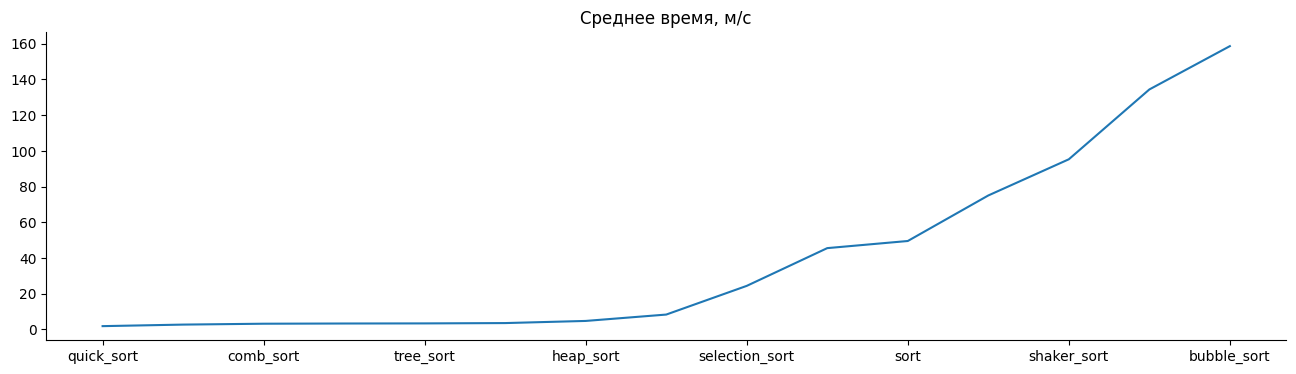

In [30]:
from matplotlib import pyplot as plt
df1000.plot(kind='line', figsize=(16, 4), title='Среднее время, м/с')
plt.gca().spines[['top', 'right']].set_visible(False)

### Время сортировки для случайно сгенерированного списка в 10 000 элементов

In [31]:
dict_times_random = dict()

for type_of_search in list_sort:
    dict_times_random[type_of_search] = dict()
    time_sort = measure_sort(type_of_search, source_list10000, n_repeat)
    dict_times_random[type_of_search]['min_random, msec'] = time_sort[0] * 1000
    dict_times_random[type_of_search]['average_random, msec'] = time_sort[1] * 1000
    dict_times_random[type_of_search]['max_random, msec'] = time_sort[2] * 1000

In [32]:
df_random10000 = pd.DataFrame.from_dict(dict_times_random, orient='index')
df_random10000

,"min_random, msec","average_random, msec","max_random, msec"
bubble_sort,21130.872854,21130.872854,21130.872854
shaker_sort,11485.816304,11485.816304,11485.816304
insertion_sort,5330.703531,5330.703531,5330.703531
gnome_sort,14132.638809,14132.638809,14132.638809
gnome_opt_sort,10026.724911,10026.724911,10026.724911
merge_sort,49.610224,49.610224,49.610224
tree_sort,49.003735,49.003735,49.003735
tim_sort,44.257230,44.257230,44.257230
selection_sort,2513.063840,2513.063840,2513.063840
comb_sort,53.782173,53.782173,53.782173


In [33]:
df10000 = df_random10000['average_random, msec'].sort_values()
df10000

quick_sort           21.870164
tim_sort             44.257230
shell_sort           44.282545
tree_sort            49.003735
merge_sort           49.610224
comb_sort            53.782173
heap_sort            71.900185
smooth_sort         115.966396
selection_sort     2513.063840
sort               3343.710457
insertion_sort     5330.703531
gnome_opt_sort    10026.724911
shaker_sort       11485.816304
gnome_sort        14132.638809
bubble_sort       21130.872854
Name: average_random, msec, dtype: float64

Наримуем на графике для наглядности.

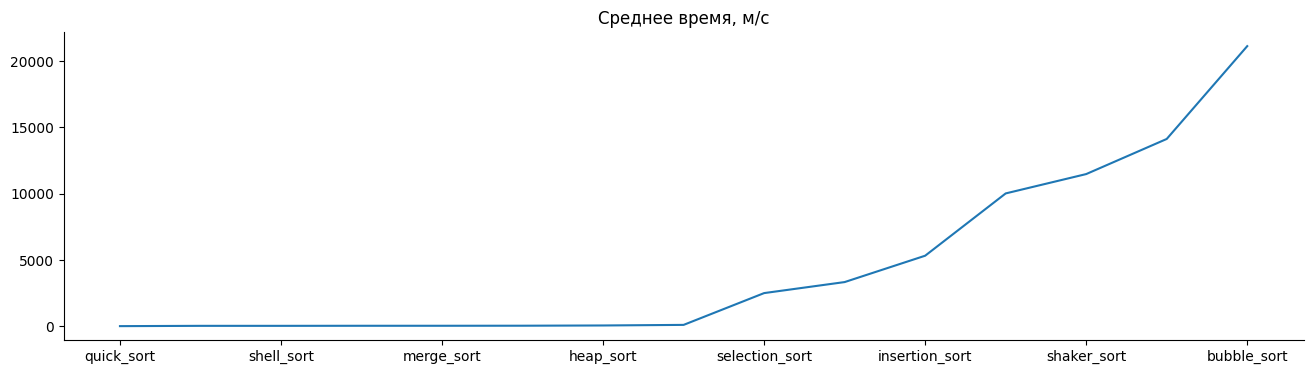

In [34]:
from matplotlib import pyplot as plt
df10000.plot(kind='line', figsize=(16, 4), title='Среднее время, м/с')
plt.gca().spines[['top', 'right']].set_visible(False)

### Время сортировки для случайно сгенерированного списка в 25 000 элементов

In [37]:
dict_times_random = dict()

for type_of_search in list_sort:
    dict_times_random[type_of_search] = dict()
    time_sort = measure_sort(type_of_search, source_list25000, n_repeat)
    dict_times_random[type_of_search]['min_random, msec'] = time_sort[0] * 1000
    dict_times_random[type_of_search]['average_random, msec'] = time_sort[1] * 1000
    dict_times_random[type_of_search]['max_random, msec'] = time_sort[2] * 1000

In [38]:
df_random25000 = pd.DataFrame.from_dict(dict_times_random, orient='index')
df_random25000

,"min_random, msec","average_random, msec","max_random, msec"
bubble_sort,138877.269397,138877.269397,138877.269397
shaker_sort,81923.788855,81923.788855,81923.788855
insertion_sort,39853.710775,39853.710775,39853.710775
gnome_sort,95140.511964,95140.511964,95140.511964
gnome_opt_sort,66173.435549,66173.435549,66173.435549
merge_sort,248.547628,248.547628,248.547628
tree_sort,297.197562,297.197562,297.197562
tim_sort,143.199592,143.199592,143.199592
selection_sort,19156.483592,19156.483592,19156.483592
comb_sort,200.961411,200.961411,200.961411


In [39]:
df25000 = df_random25000['average_random, msec'].sort_values()
df25000

quick_sort            65.348124
tim_sort             143.199592
shell_sort           162.905919
comb_sort            200.961411
heap_sort            214.929756
merge_sort           248.547628
tree_sort            297.197562
smooth_sort          324.941851
selection_sort     19156.483592
sort               32281.136194
insertion_sort     39853.710775
gnome_opt_sort     66173.435549
shaker_sort        81923.788855
gnome_sort         95140.511964
bubble_sort       138877.269397
Name: average_random, msec, dtype: float64

Наримуем на графике для наглядности.

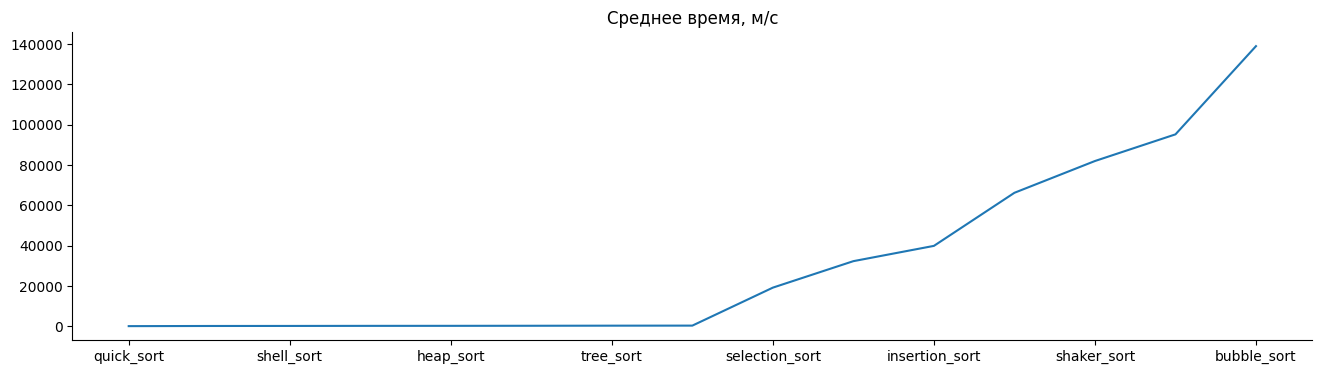

In [40]:
from matplotlib import pyplot as plt
df25000.plot(kind='line', figsize=(16, 4), title='Среднее время, м/с')
plt.gca().spines[['top', 'right']].set_visible(False)

### Выводы

Из результатов замеров мы видим, что лучше всего себя показывает "Быстрая сортировка" во всех трех испытаниях, также успешно прошла тест "Timsort" и "сортировка Шелла", но на небольших данных "сортировка расческой" тоже попала в тройку лидеров. Хуже всего на все списках были "шейкерная", "гномья сортиврока" и "пузырьковая сортировка".

Соответственно, сделаем вывод, что если у вас список данных небольшой, то можно применять "сортировку расческой". Ну а если неизвестно сколько будет данных заранее, то лучше использовать "Быструю сортировку", "Timsort" или "сортировку Шелла".